In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("Downloads/train.csv")

In [3]:
test = pd.read_csv("Downloads/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()
cat = ['Pclass','Sex','SibSp','Parch','Cabin','Embarked']
num = ['Survived','Age','Fare']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# missing values in AGE, Cabin , and embark(2)

In [7]:
import seaborn as sns
sns.set()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# missing values in test are AGE, Cabin, fare(2)

In [8]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

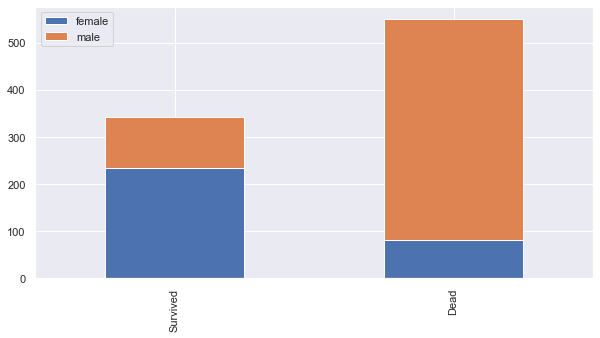

In [9]:
bar_chart('Sex')

None  None  None  None  None  None  

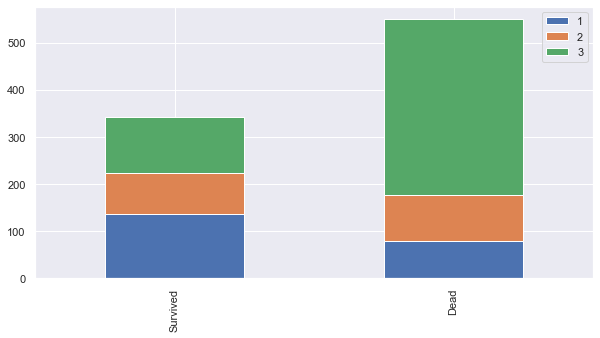

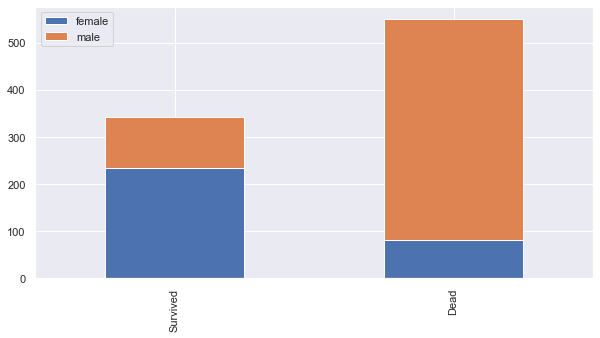

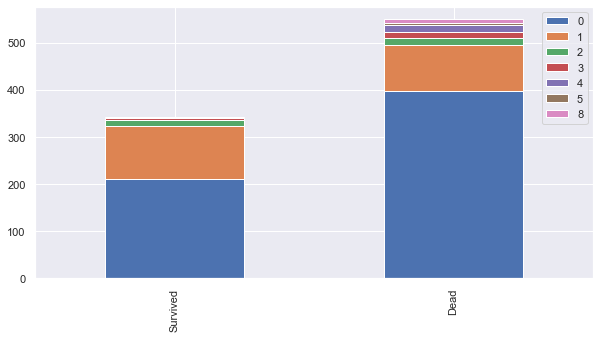

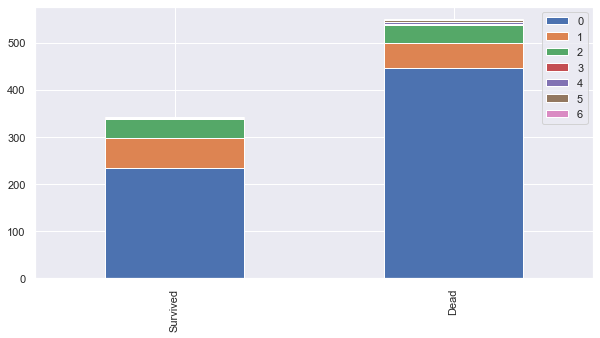

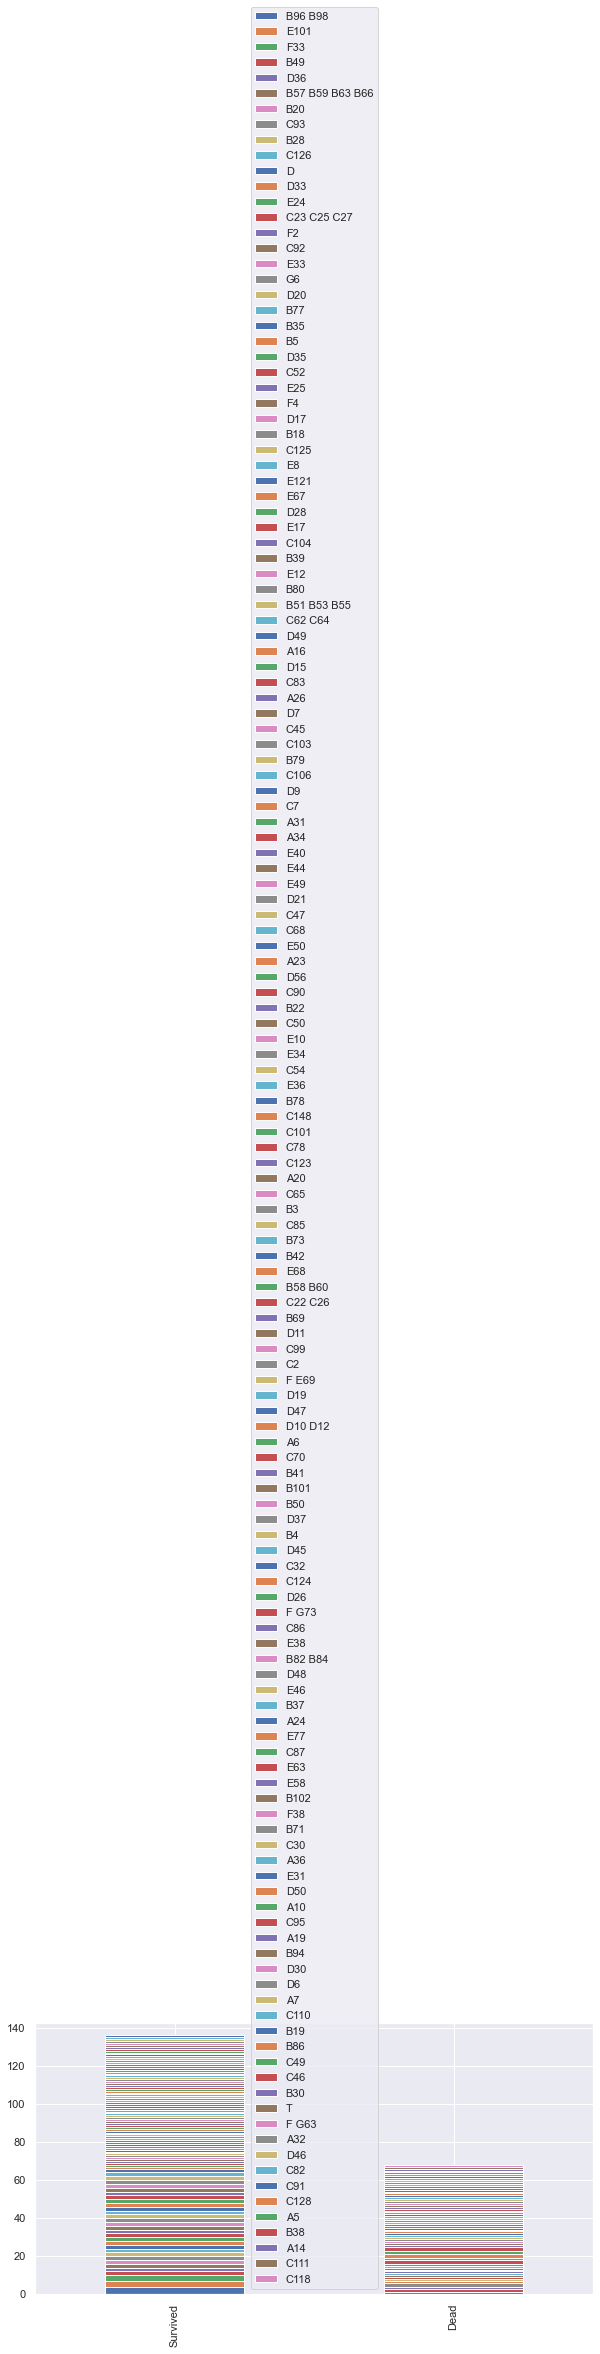

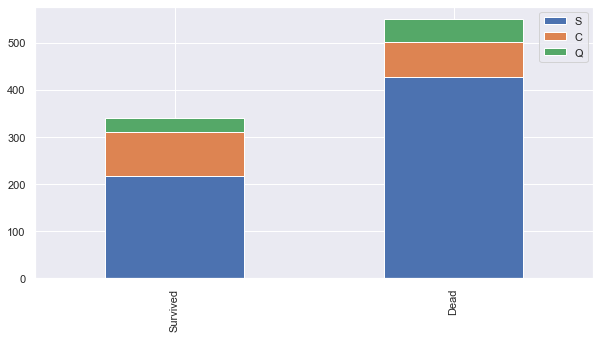

In [10]:
for i in cat:
    print(bar_chart(i),end = "  ")

# data exploration for categorical variable - results

for Pclass: mostly 1st class people survived as compared to 3rd class, and second class results are not much different

for sex: more no of female survived as compared to men

for sbsip : a person with 2 siblings are more likely to survie and the person with no siblings are likely to be dead.

for parch : a person with parent/children are likely to survive and a person with no parent/children are likely to dead

for embarked  : person boarded from c likely  to survive,  person boarded from q and s likely to die more,

later check for correlation.

# now numeric and other variables-- feature engineering

In [11]:
train_test = [train,test]

In [12]:
for data in train_test:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Jonkheer      1
Mme           1
Capt          1
Don           1
Countess      1
Sir           1
Lady          1
Name: Title, dtype: int64

In [14]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [15]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test:
    data['Title'] = data['Title'].map(title_mapping)

In [16]:
test.Title.value_counts()

0    240
1     78
2     72
3     28
Name: Title, dtype: int64

In [17]:
train.Title.value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

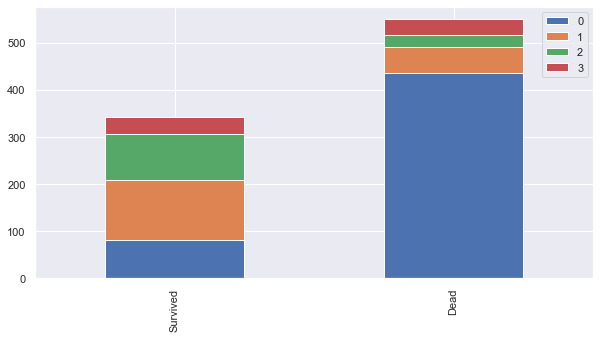

In [18]:
bar_chart('Title')

person with title as MR. are more likely dead and rest others survive as compare to MR

In [19]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [21]:
sex_mapping = {"male": 0, "female": 1}
for data in train_test:
    data['Sex'] = data['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

C:\Users\nilay khare\.conda\envs\tensorflow_python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nilay khare\.conda\envs\tensorflow_python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

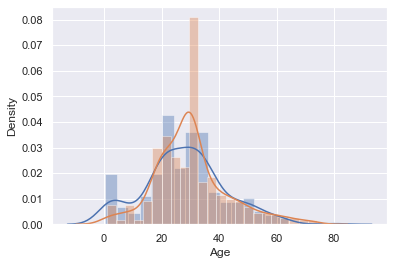

In [23]:
sns.distplot(train[train['Survived']==1]['Age'])
sns.distplot(train[train['Survived']==0]['Age'])

In [24]:
def binningAge(age):
    if age<=16:
        return 0
    elif age>16 and age<=26:
        return 1
    elif age>26 and age<=36:
        return 2
    elif age>36 and age<=62:
        return 3
    else:
        return 4

In [25]:
for data in train_test:
    data['ageGrouped']= data['Age'].apply(lambda x : binningAge(x))
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,2


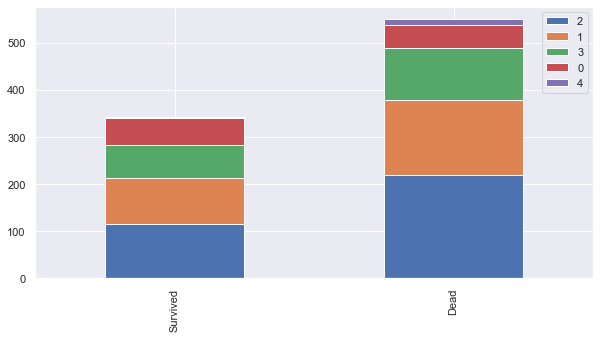

In [26]:
bar_chart('ageGrouped')

In [27]:
train[train['Survived']==0]['ageGrouped'].value_counts()

2    220
1    158
3    111
0     48
4     12
Name: ageGrouped, dtype: int64

In [28]:
train[train['Survived']==1]['ageGrouped'].value_counts()- train[train['Survived']==0]['ageGrouped'].value_counts()

2   -104
1    -61
3    -42
0      9
4     -9
Name: ageGrouped, dtype: int64

person in age group of 1,2,3,4 are more likely to be dead as compare to age group of 0,

now for embark

In [29]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

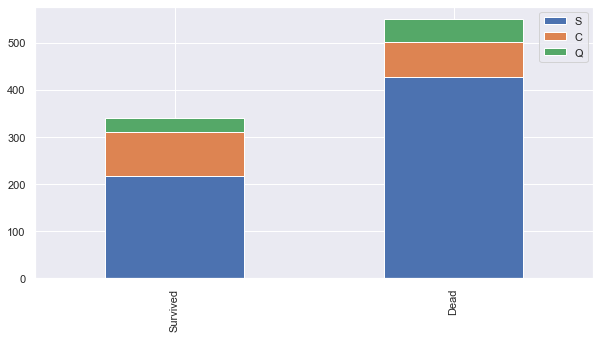

In [30]:
bar_chart('Embarked')

In [31]:
# missing value for embarked can assigned with the help of other categorical variable like pclass 

<AxesSubplot:>

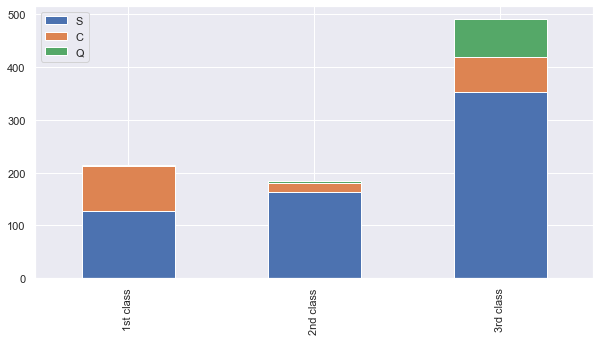

In [32]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [33]:
# s more then 50% in all class,
# q only embarked in 3rd and rarely in 2nd class
# c are mostly in 1 and 3 class,,
# s in most common in all class, thats why filling s in missing values

In [34]:
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [35]:
train[train['Pclass']==2]['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [36]:
train[train['Pclass']==3]['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [37]:
for data in train_test:
    data['Embarked'] = data['Embarked'].fillna('S')


In [38]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

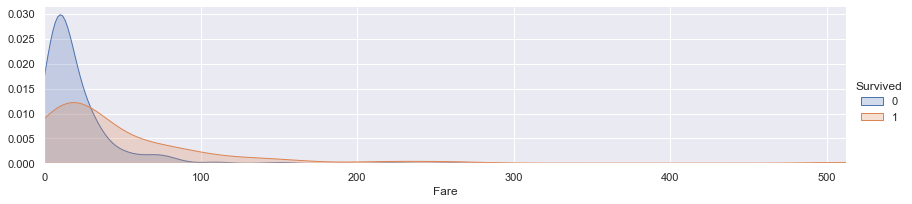

In [39]:
sns.FacetGrid(train, hue="Survived",aspect=4).map(sns.kdeplot,'Fare',shade= True).set(xlim=(0, train['Fare'].max())).add_legend()

(0.0, 30.0)

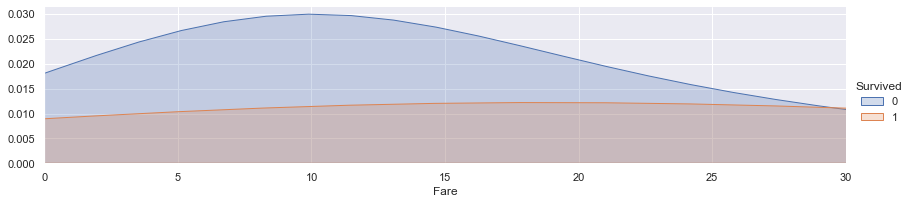

In [40]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max())).add_legend()
plt.xlim(0,30)

In [41]:
'''for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 17, 'FareGropued'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'FareGropued'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'FareGropued'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'FareGropued'] = 3'''
def fare_group(x):
    if x<=17:
        return 0
    elif x>17 and x<=30:
        return 1
    elif x>30 and x<=100:
        return 2
    else:
        return 3

In [42]:
for data in train_test:
    data['fareGrouped']= data['Fare'].apply(lambda x : fare_group(x))
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped,fareGrouped
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0


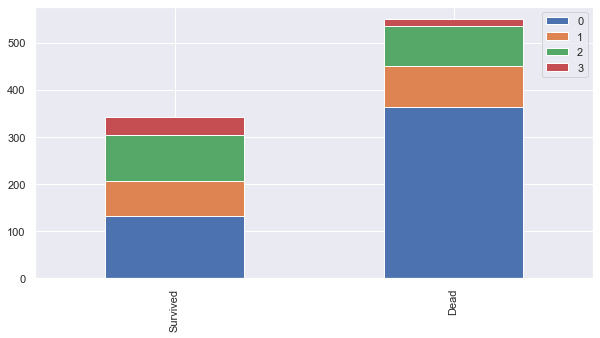

In [43]:
bar_chart('fareGrouped')

In [44]:
# those who belong to group 0 and 1 are more likely to be dead more as compare group 2 and 3

<AxesSubplot:>

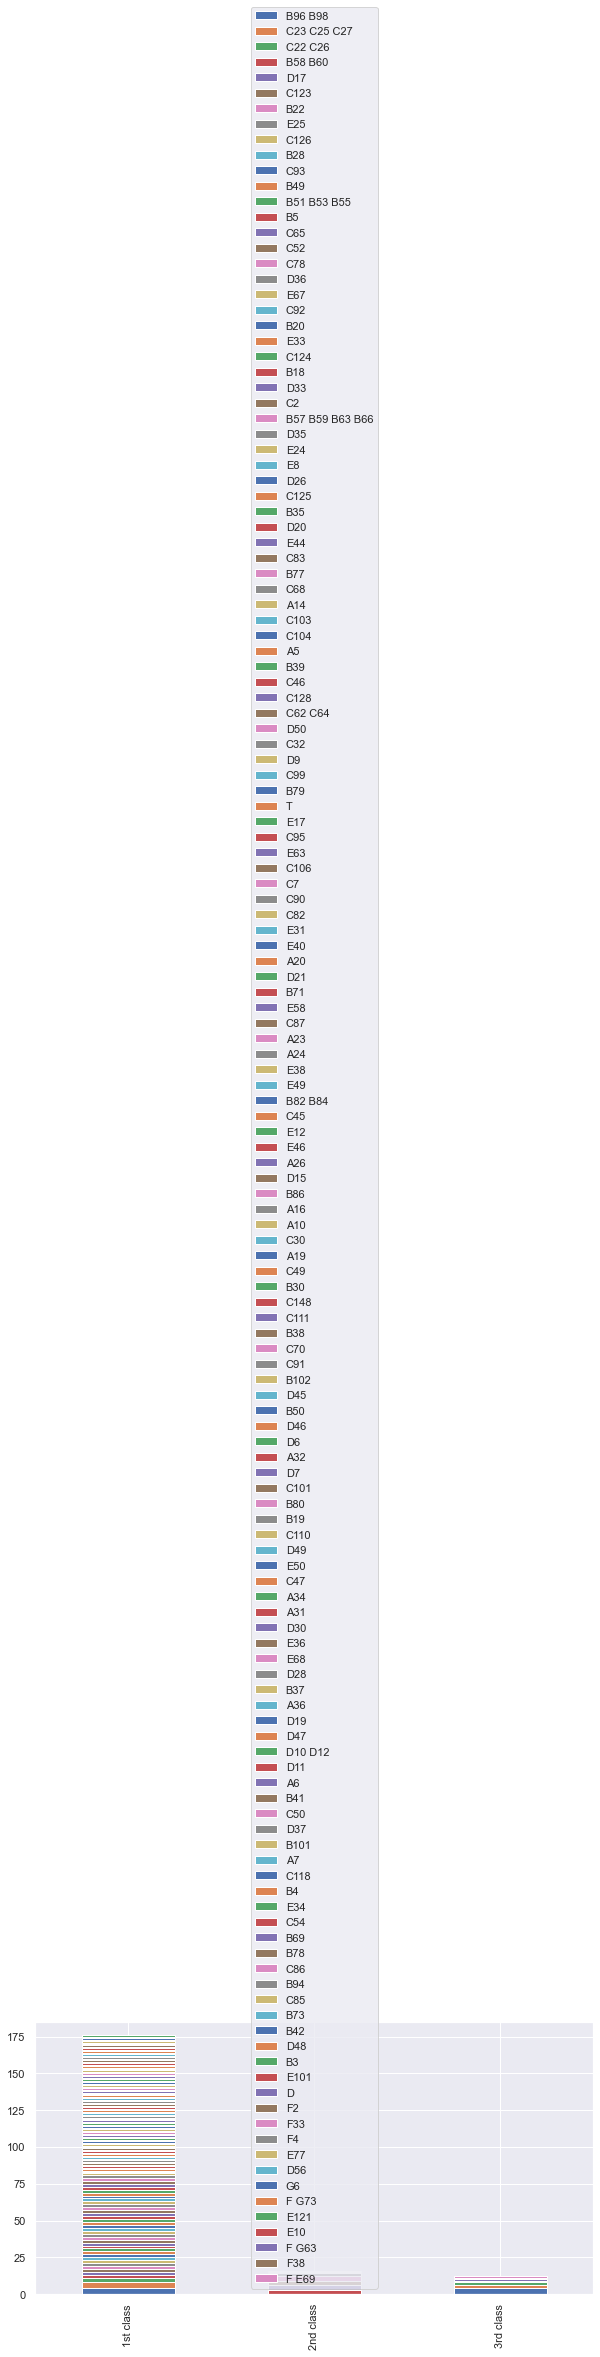

In [45]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [46]:
for dataset in train_test:
    dataset['CabinCoach'] = dataset['Cabin'].str[:1]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped,fareGrouped,CabinCoach
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,NaN
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3,2,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,NaN
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2,C
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,NaN


<AxesSubplot:>

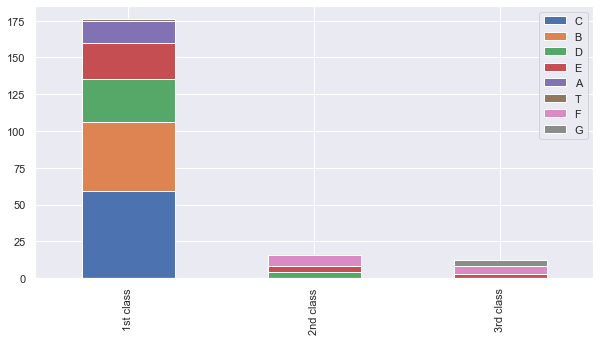

In [47]:
Pclass1 = train[train['Pclass']==1]['CabinCoach'].value_counts()
Pclass2 = train[train['Pclass']==2]['CabinCoach'].value_counts()
Pclass3 = train[train['Pclass']==3]['CabinCoach'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [48]:
train[train['Pclass']==1]['CabinCoach'].value_counts().sort_index()

A    15
B    47
C    59
D    29
E    25
T     1
Name: CabinCoach, dtype: int64

In [49]:
train[train['Pclass']==2]['CabinCoach'].value_counts().sort_index()

D    4
E    4
F    8
Name: CabinCoach, dtype: int64

In [50]:
train[train['Pclass']==3]['CabinCoach'].value_counts().sort_index()

E    3
F    5
G    4
Name: CabinCoach, dtype: int64

1st : a b c d e t

2nd : d e f

3rd : e f g

In [51]:
train['CabinCoach'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinCoach, dtype: int64

In [52]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test:
    dataset['CabinCoach'] = dataset['CabinCoach'].map(cabin_mapping)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped,fareGrouped,CabinCoach
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,NaN
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3,2,0.8
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,NaN
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2,0.8
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,NaN


In [54]:
# fill missing Fare with median fare for each Pclass
train["CabinCoach"].fillna(train.groupby("Pclass")["CabinCoach"].transform("median"), inplace=True)
test["CabinCoach"].fillna(test.groupby("Pclass")["CabinCoach"].transform("median"), inplace=True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped,fareGrouped,CabinCoach
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3,2,0.8
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,2.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2,0.8
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,2.0


In [56]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

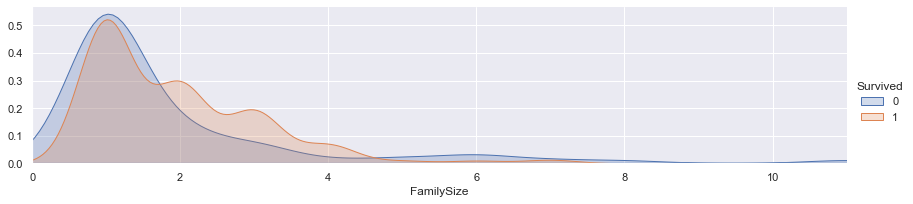

In [57]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [58]:
test['FamilySize'].describe()

count    418.000000
mean       1.839713
std        1.519072
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [59]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,ageGrouped,fareGrouped,CabinCoach,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2.0,0.4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2,3,2,0.8,0.4
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,2.0,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2,0.8,0.4
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,2.0,0.0


In [61]:
features_drop = ['Ticket', 'SibSp', 'Parch','Fare','Cabin','Age']
df_train = train.drop(features_drop,axis=1)
df_test = test.drop(features_drop,axis=1)


In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,ageGrouped,fareGrouped,CabinCoach,FamilySize
0,1,0,3,0,0,0,1,0,2.0,0.4
1,2,1,1,1,1,2,3,2,0.8,0.4
2,3,1,3,1,0,1,1,0,2.0,0.0
3,4,1,1,1,0,2,2,2,0.8,0.4
4,5,0,3,0,0,0,2,0,2.0,0.0


In [63]:
df_train = df_train.drop(['PassengerId'],axis =1)
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,ageGrouped,fareGrouped,CabinCoach,FamilySize
0,0,3,0,0,0,1,0,2.0,0.4
1,1,1,1,1,2,3,2,0.8,0.4
2,1,3,1,0,1,1,0,2.0,0.0
3,1,1,1,0,2,2,2,0.8,0.4
4,0,3,0,0,0,2,0,2.0,0.0


In [64]:
train_data = df_train.drop(['Survived'],axis=1)
train_data
target = df_train['Survived']

In [65]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Embarked     891 non-null    int64  
 3   Title        891 non-null    int64  
 4   ageGrouped   891 non-null    int64  
 5   fareGrouped  891 non-null    int64  
 6   CabinCoach   891 non-null    float64
 7   FamilySize   891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# KNN

In [68]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.84269663 0.86516854 0.83146067
 0.83146067 0.79775281 0.83146067 0.83146067]


In [69]:
round(np.mean(score)*100, 2)

82.83

# Decision Tree


In [70]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.8988764  0.76404494
 0.84269663 0.82022472 0.74157303 0.79775281]


In [71]:
round(np.mean(score)*100, 2)

80.03

In [72]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.80898876 0.84269663 0.82022472 0.87640449 0.80898876
 0.83146067 0.80898876 0.73033708 0.78651685]


In [73]:
round(np.mean(score)*100, 2)

81.26

In [74]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [75]:
round(np.mean(score)*100, 2)

78.78

In [76]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


83.5

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
 11  ageGrouped   418 non-null    int64  
 12  fareGrouped  418 non-null    int64  
 13  CabinCoach   418 non-null    float64
 14  FamilySize   418 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 49.1+ KB


In [78]:
features_drop = ['Ticket', 'SibSp', 'Parch','Fare','Cabin','Age']
test_data = test.drop(features_drop,axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Embarked     418 non-null    int64  
 4   Title        418 non-null    int64  
 5   ageGrouped   418 non-null    int64  
 6   fareGrouped  418 non-null    int64  
 7   CabinCoach   418 non-null    float64
 8   FamilySize   418 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [79]:
test_data = test_data.drop(['PassengerId'],axis=1)


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Embarked     418 non-null    int64  
 3   Title        418 non-null    int64  
 4   ageGrouped   418 non-null    int64  
 5   fareGrouped  418 non-null    int64  
 6   CabinCoach   418 non-null    float64
 7   FamilySize   418 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [81]:
clf = SVC()
clf.fit(train_data, target)
prediction = clf.predict(test_data)

In [82]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [83]:
submission.to_csv('submission.csv', index=False)

In [84]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
